### In Deep Learning Regression Problem Solve 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohansacharya/graduate-admissions")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\sande\.cache\kagglehub\datasets\mohansacharya\graduate-admissions\versions\2


In [25]:
import os

# Read the dataset
print(os.listdir(path))

df=pd.read_csv(path+"/Admission_Predict_Ver1.1.csv")

['Admission_Predict.csv', 'Admission_Predict_Ver1.1.csv']


In [26]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [28]:
df.shape

(500, 9)

In [29]:
df.duplicated().sum()


0

In [30]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [31]:
df.drop(columns=['Serial No.'], inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [32]:
X=df.drop(columns=['Chance of Admit '])
y=df['Chance of Admit ']
from sklearn.model_selection import train_test_split


In [33]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [34]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [36]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [39]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [40]:
model=Sequential()

model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(1, activation='linear'))

In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0000e+00 - loss: 0.4541 - val_accuracy: 0.0000e+00 - val_loss: 0.4038
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.3733 - val_accuracy: 0.0000e+00 - val_loss: 0.3156
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.2778 - val_accuracy: 0.0000e+00 - val_loss: 0.2263
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.2012 - val_accuracy: 0.0000e+00 - val_loss: 0.1461
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.1366 - val_accuracy: 0.0000e+00 - val_loss: 0.0904
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0857 - val_accuracy: 0.0000e+00 - val_loss: 0.0602
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0600 - val_accuracy: 0.0000e+00 - val_loss: 0.0495
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

In [43]:
y_pred=model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [44]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(y_test,y_pred)

0.47712159992657

In [45]:
history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

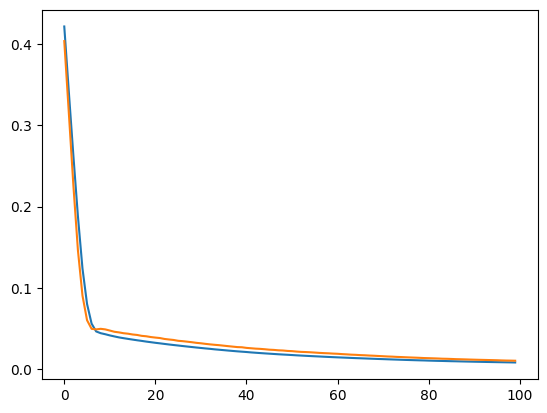

In [46]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')